<a href="https://colab.research.google.com/github/Av1352/MOOC/blob/main/MOOC_Breast_Cancer_(RA1911026040048).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18CSP101L- Machine Learning Assingment 1




**The data I have used for this Activity is data about diabetes : Breast_Cancer dataset**

Following are the few libraries we need to import for our fitting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.datasets import load_breast_cancer
c=load_breast_cancer()

**Now Modifying the given data to dataframe using pandas and numpy **

In [2]:
df=pd.DataFrame(np.c_[c['data'],c['target']],columns=np.append(c['feature_names'],['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Viewing the relationship between fetaures**

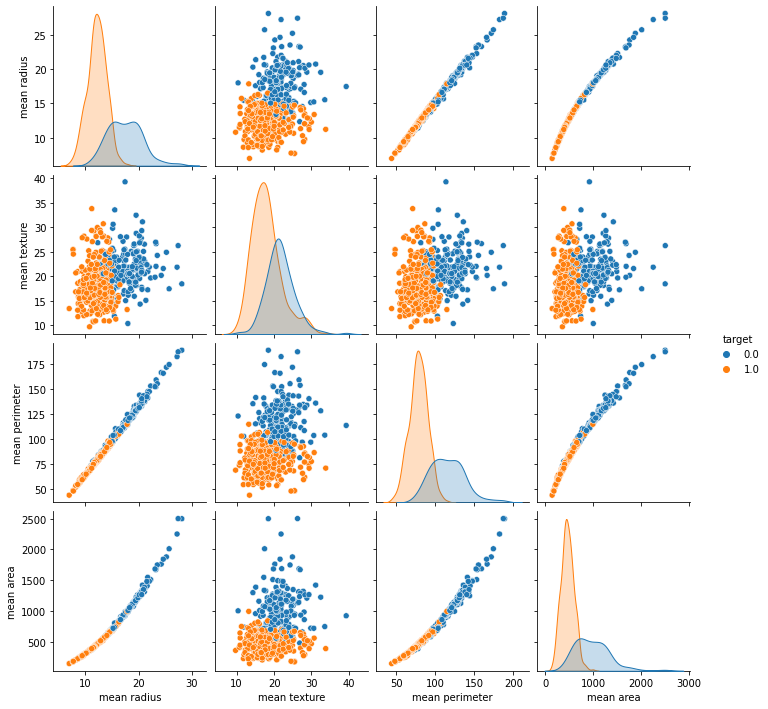

In [3]:
sb.pairplot(df,hue='target',vars=['mean radius','mean texture','mean perimeter','mean area'])

**Interpretating  the Heatmap of our features**

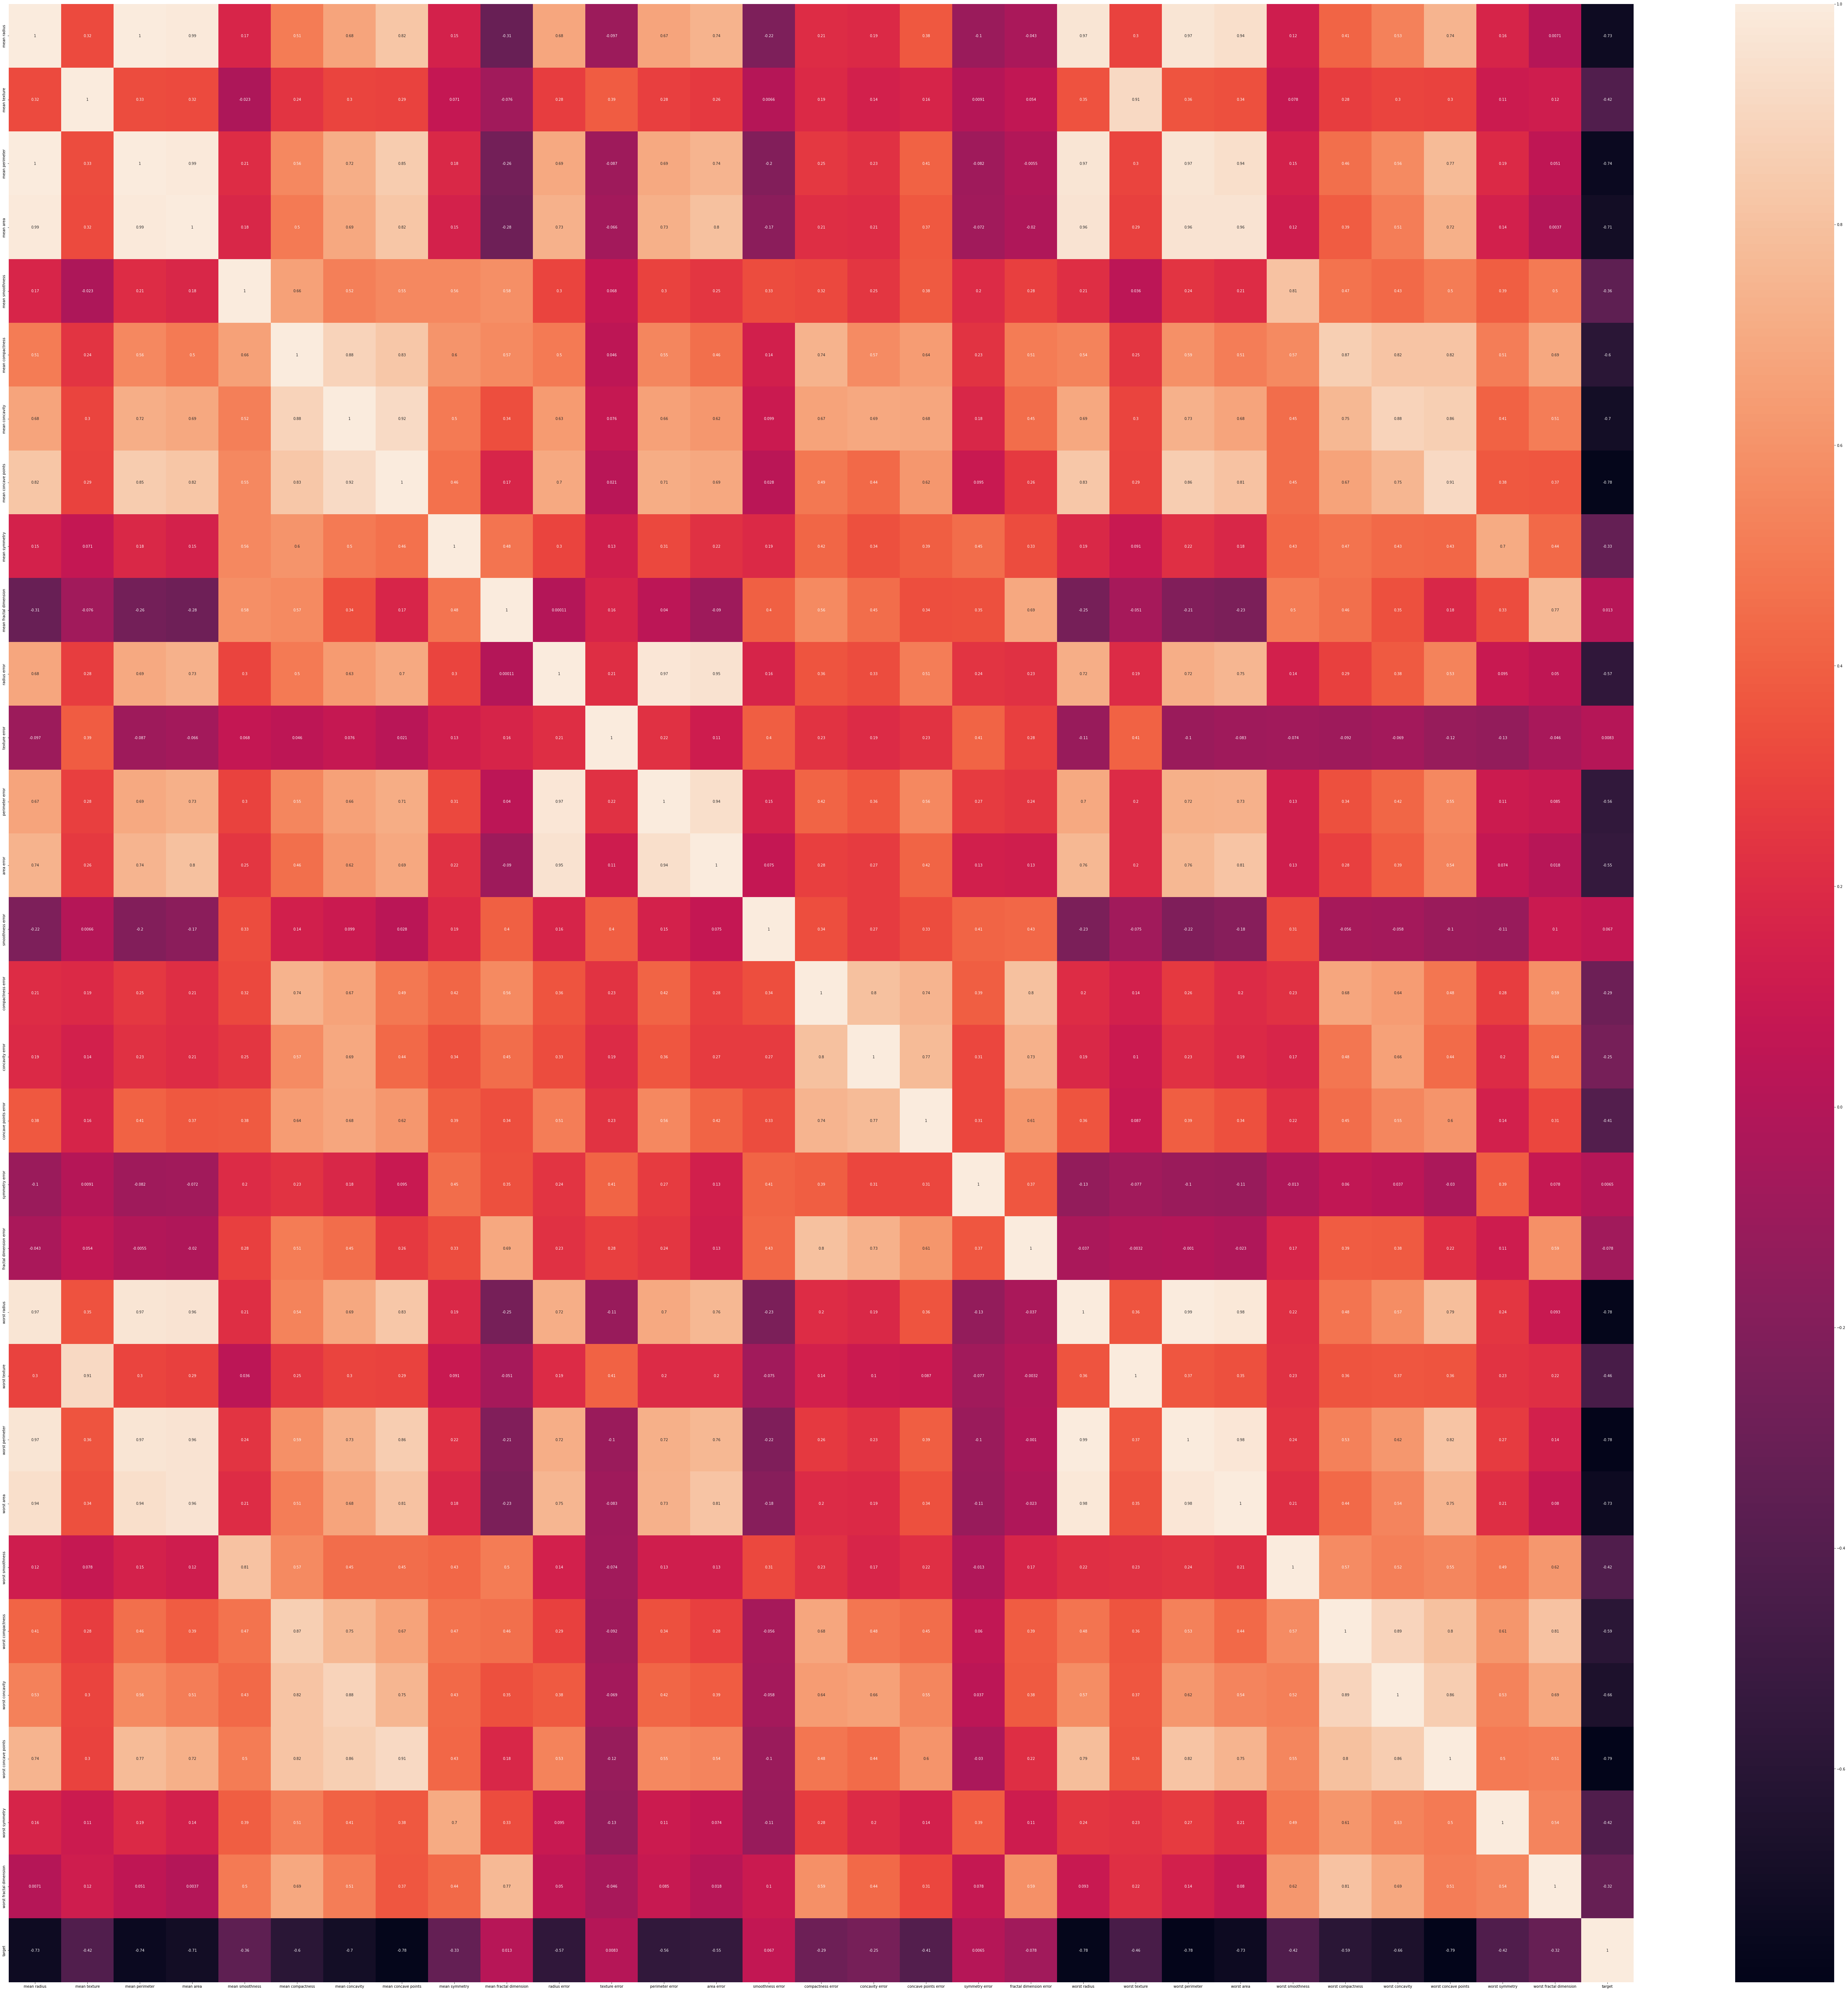

In [4]:
plt.figure(figsize=(100,100))
sb.heatmap(df.corr(),annot=True)

# **SVM MODEL TRAININING**

**Splitting the data into training and testing**

In [5]:
X=df.drop(['target'],axis=1)
Y=df['target']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

**SVM MODEL IMPLEMENTATION**

In [9]:
svm=SVC()
svm.fit(X_train,Y_train)
y_predict=svm.predict(X_test)

**Interpretating Confusion matrix**

In [10]:
s=np.array(confusion_matrix(Y_test,y_predict,labels=[1,0]))
confusion=pd.DataFrame(s,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_helathy'])
confusion

,predicted_cancer,predicted_helathy
is_cancer,72,0
is_healthy,11,31


**Interpretating Confusion matrix on Heat Map**

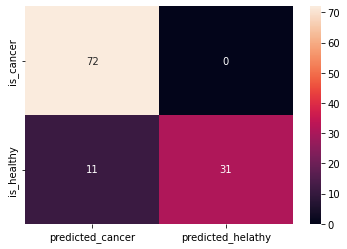

In [11]:
sb.heatmap(confusion,annot=True)

**Classifiucation Report**

In [12]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        42
         1.0       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



**Normailizing Training Data**

In [13]:
X_train_min=X_train.min()
X_train_min

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.050240
radius error                 0.115300
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.009539
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [15]:
X_train_max=X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09575
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             0.93790
worst concav

In [14]:
X_train_range=(X_train.max()-X_train.min())
X_train_range

mean radius                  21.129000
mean texture                 29.570000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.110770
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.045510
radius error                  2.757700
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.069411
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.520000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [16]:
X_train_scale=(X_train-X_train.min())/(X_train_range)
X_train_scale.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
408,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.470707,0.229620,0.122711,0.113397,0.108561,0.080329,0.187579,0.191276,0.063359,0.280356,0.066286,0.084339,0.467805,0.356876,0.436725,0.286030,0.508684,0.380196,0.282137,0.678351,0.355038,0.319306
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.188750,0.232766,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.115558,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.195155,0.341880,0.558419,0.189639,0.230967
307,0.095556,0.158607,0.086863,0.043606,0.157263,0.036133,0.008625,0.017256,0.367677,0.397495,0.021503,0.208805,0.018235,0.005579,0.192950,0.019760,0.009295,0.065770,0.251704,0.043468,0.062931,0.214552,0.052244,0.024651,0.181206,0.027487,0.012581,0.047732,0.338641,0.244459
386,0.247480,0.148123,0.241794,0.135101,0.256838,0.180510,0.160239,0.125944,0.295960,0.248297,0.054865,0.104027,0.063139,0.024576,0.091512,0.210352,0.109697,0.205910,0.139330,0.128767,0.184988,0.193763,0.185467,0.084718,0.207555,0.236995,0.262906,0.314089,0.264021,0.353678
404,0.253632,0.177207,0.238408,0.138112,0.308658,0.080762,0.049414,0.102087,0.258081,0.150297,0.097182,0.121022,0.086934,0.043609,0.203590,0.046858,0.033005,0.195113,0.290458,0.018559,0.186766,0.128731,0.167837,0.085504,0.222083,0.044091,0.042060,0.164708,0.173954,0.048506


**Normailizing Testing Data**

In [17]:
X_test_min=X_test.min()
X_test_range=(X_test.max()-X_test.min())
X_test_scale=(X_test-X_test.min())/(X_test_range)

# Now Fitting the Normalized data into **SVM**

In [18]:
svm.fit(X_train_scale,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Prediction with Scaled dataset**

In [19]:
y_predict=svm.predict(X_test_scale)
s=confusion_matrix(Y_test,y_predict)

**Confusion Matrix on Scaled dataset**

In [20]:
s=np.array(confusion_matrix(Y_test,y_predict,labels=[1,0]))
confusion=pd.DataFrame(s,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_helathy'])
confusion

,predicted_cancer,predicted_helathy
is_cancer,71,1
is_healthy,2,40


**Classification Report**

In [21]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        42
         1.0       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

